# Purpose:
- to check mean FOVs from suite2p folder data (ops.npy)

In [1]:

import numpy as np
from pathlib import Path
import os
from matplotlib import pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [2]:
data_dir_base = Path('D:\\ROICat_test_dataset')
mouse_ids = os.listdir(data_dir_base)
mouse_ids = [mouse_id for mouse_id in mouse_ids if mouse_id.isnumeric()]
mouse_ids

['721291', '726087']

In [3]:
mouse_id = mouse_ids[0]
data_dir = data_dir_base / mouse_id
containers = os.listdir(data_dir)
container = containers[0]
container_dir = data_dir / container
planes = os.listdir(container_dir)
planes = [plane for plane in planes if plane.isnumeric()]
planes

['1348159921',
 '1348170446',
 '1348170470',
 '1363363122',
 '1364562811',
 '1367440735']

In [10]:
for mouse_id in mouse_ids:
    data_dir = data_dir_base / mouse_id
    containers = os.listdir(data_dir)
    for container in containers:
        container_dir = data_dir / container
        planes = os.listdir(container_dir)
        planes = [plane for plane in planes if plane.isnumeric()]
        for plane in planes:
            plane_dir = container_dir / plane
            ops = np.load(plane_dir / 'ops.npy', allow_pickle=True).item()
            mean_image = ops['meanImg']
            # save to png
            plt.imsave(container_dir / f'{plane}_mean_image.png', mean_image, cmap='gray')

            stat = np.load(plane_dir / 'stat.npy', allow_pickle=True)
            fig, ax = plt.subplots()
            ax.imshow(ops['meanImg'], cmap='gray')
            for i in range(len(stat)):
                hull = ConvexHull(np.vstack((stat[i]['xpix'], stat[i]['ypix'])).T)
                xpoints = hull.points[hull.vertices,0]
                xpoints = np.append(xpoints, xpoints[0])
                ypoints = hull.points[hull.vertices,1]
                ypoints = np.append(ypoints, ypoints[0])
                ax.plot(xpoints, ypoints, 'r-', lw=0.5)
            ax.axis('off')
            fig.savefig(container_dir / f'{plane}_mean_image_with_rois.png', bbox_inches='tight', dpi=300)
            plt.close(fig)

In [4]:
plane = planes[0]
plane_dir = container_dir / plane
ops = np.load(plane_dir / 'ops.npy', allow_pickle=True).item()
stat = np.load(plane_dir / 'stat.npy', allow_pickle=True)

array([228., 230., 232., 238., 239., 240., 240., 239., 229., 228.])

In [8]:
hull.points[hull.vertices,1]

array([508., 506., 505., 505., 506., 508., 510., 511., 511., 510.])

(-0.5, 511.5, 511.5, -0.5)

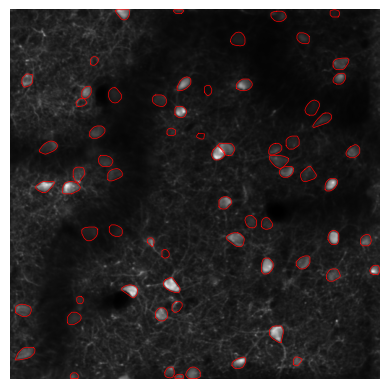

In [9]:
%matplotlib inline

fig, ax = plt.subplots()
ax.imshow(ops['meanImg'], cmap='gray')
for i in range(len(stat)):
    hull = ConvexHull(np.vstack((stat[i]['xpix'], stat[i]['ypix'])).T)
    xpoints = hull.points[hull.vertices,0]
    xpoints = np.append(xpoints, xpoints[0])
    ypoints = hull.points[hull.vertices,1]
    ypoints = np.append(ypoints, ypoints[0])
    ax.plot(xpoints, ypoints, 'r-', lw=0.5)
ax.axis('off')

